# Clustered dotplots

In [1]:
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
save_plot <- function(p, fn, w, h){
    for(ext in c(".pdf", ".png", ".svg")){
        ggsave(filename=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

## Get data

In [3]:
xci <- data.table::fread("../../_m/xci_enrichment_analysis_3brainRegions.txt")
xci %>% filter(Bonferroni < 0.05)

Tissue,XCI status,OR,PValue,Direction,Bonferroni
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
Caudate,escape,52.541253,3.525156e-37,All,3.172640e-36
Caudate,variable,5.687289,1.018592e-03,All,9.167329e-03
Caudate,escape,136.346071,1.182377e-42,Female Bias,1.064139e-41
Caudate,variable,13.068562,8.613979e-05,Female Bias,7.752581e-04
DLPFC,escape,29.157326,2.319487e-28,All,2.087538e-27
DLPFC,escape,7.182445,3.797823e-03,Male Bias,3.418041e-02
DLPFC,escape,58.037037,6.541881e-30,Female Bias,5.887693e-29
Hippocampus,escape,148.678385,2.768297e-41,All,2.491467e-40
Hippocampus,escape,32.317784,2.362670e-03,Male Bias,2.126403e-02


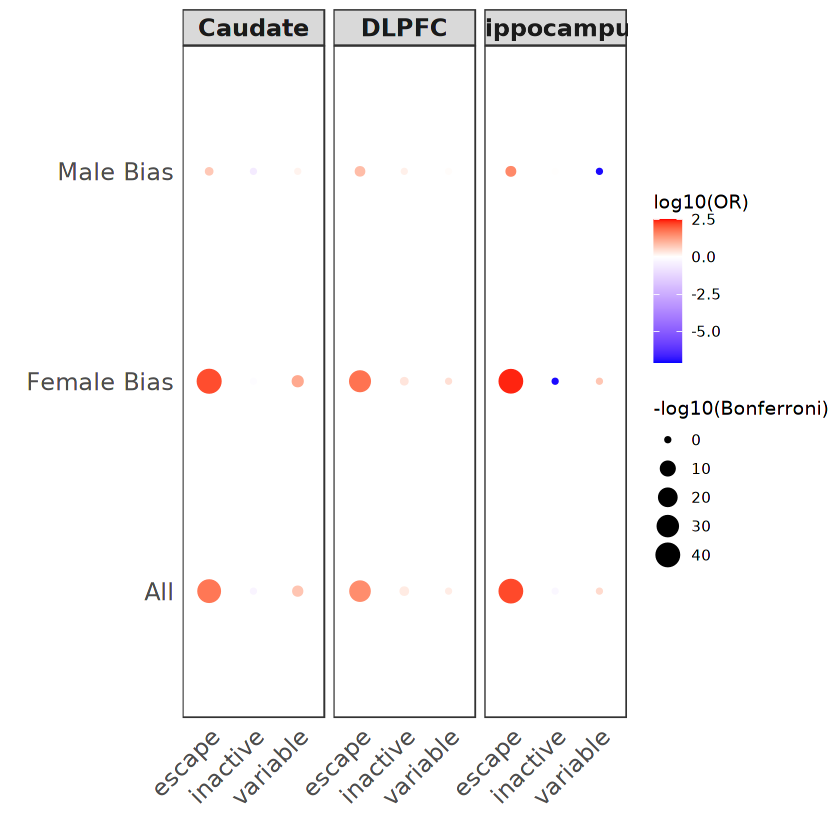

In [4]:
err = 0.0000001
df <- xci %>% 
    mutate(`-log10(Bonferroni)` = -log10(Bonferroni), 
           `OR Percentile` = OR / (1+OR), 
           `log10(OR)` = log10(OR+err)) 
y1 <- max(df$`log10(OR)`)+0.1
y0 <- min(df$`log10(OR)`)-0.1

dotplot = df %>% 
    #filter(OR != 0) %>%
    ggplot(aes(x=`XCI status`, y=Direction, color=`log10(OR)`, 
               size=`-log10(Bonferroni)`)) + 
    geom_point() + ylab('') + xlab('') + facet_grid(~Tissue) +
    scale_color_gradientn(colors=c("blue", "white", "red"), 
                          values=scales::rescale(c(y0, 0, y1)), 
                          limits=c(y0, y1)) +
    theme_bw() + 
    theme(axis.line  = element_blank(), 
          axis.text.x = element_text(angle = 45, hjust=1), 
          axis.text = element_text(size=14), 
          axis.ticks = element_blank(), 
          legend.position="right", 
          panel.grid = element_blank(), 
          strip.text=element_text(size=14, face="bold"))
dotplot

In [5]:
save_plot(dotplot, "dotplot_enrichment_xci", 9, 4)

## Reproducibility Information

In [6]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2021-10-13 11:26:49 EDT"

   user  system elapsed 
  5.878   0.372   8.126 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.3 (2020-10-10)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2021-10-13                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package     * version  date       lib source        
 assertthat    0.2.1    2019-03-21 [1] CRAN (R 4.0.2)
 backports     1.2.1    2020-12-09 [1] CRAN (R 4.0.2)
 base64enc     0.1-3    2015-07-28 [1] CRAN (R 4.0.2)
 broom         0.7.9    2021-07-27 [1] CRAN (R 4.0.3)
 Cairo         1.5-12.2 2020-07-07 [1] CRAN (R 4.0.2)
 cellranger    1.1.0    2016-07-27 [1] CRAN (R 